In [1]:
import os
from os import listdir
import pandas as pd
import seaborn as sns

In [2]:
#Chart Display
import matplotlib.pyplot as plt 
import matplotlib.style as style
style.use('dark_background')

In [3]:
import datetime as dt
def convert_dt(df,name=None):
    df[name] = pd.to_datetime(df[name])
    df['agg_date'] = df[name].dt.strftime('%m%d%Y')
    df['year'] = df['agg_date'].str[-4:]
    return df

# We believe we can use daily weather and MW usage trends to predict MW outage on the PJM Grid

PJM 180 gigawatts
More than 1,000 companies are members of PJM, which serves 65 million customers and has 180 gigawatts of generating capacity. With 1,376 generation sources, 84,236 miles (135,560 km) of transmission lines and 6,038 transmission substations, PJM delivered 807 terawatt-hours of electricity in 2018.

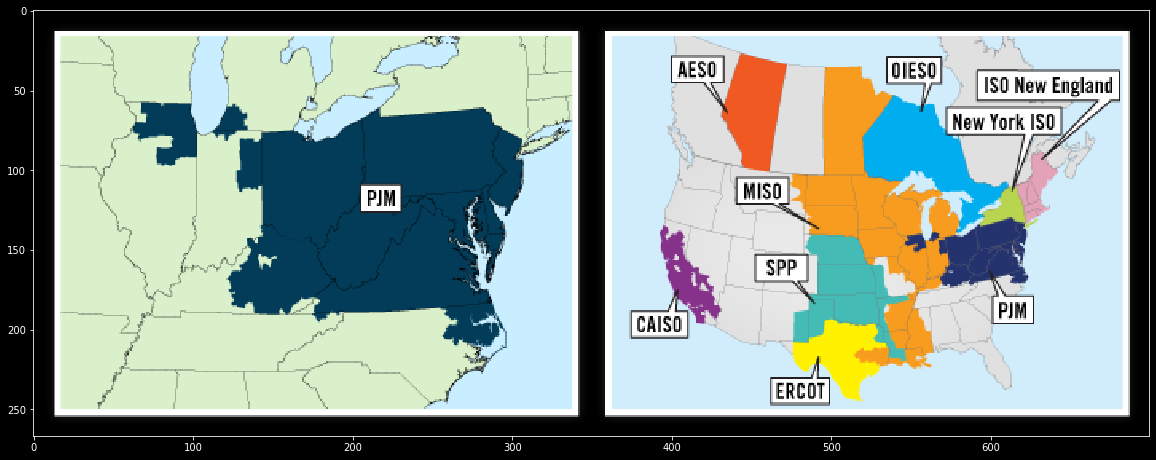

In [4]:
img_path = 'UMBC_Energy/Images/PJM.png'
img_p = plt.imread(img_path)
plt.figure(figsize=(20,10))
plt.imshow(img_p)

# NOAA Weather Data

##NOAA Features

PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)


SNOW = Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)

AWND = Wind

SNWD = Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)


TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file


TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file

##Created features

TDIFF = TMAX - TMIN

In [5]:
df_NOAA = pd.read_csv('UMBC_Energy/Raw/Raw_All_NOAA.csv',sep='|')
df_NOAA = df_NOAA[df_NOAA.datacoverage >= .99].sort_index(ascending=True)
df_NOAA = convert_dt(df_NOAA,'date')
df_NOAA

station_dt_key       date            station  PRCP  \
0       GHCND:US1DEKN0001_2015-01-01 2015-01-01  GHCND:US1DEKN0001   0.0   
1       GHCND:USC00283662_2015-01-01 2015-01-01  GHCND:USC00283662   0.0   
2       GHCND:USC00442635_2015-01-01 2015-01-01  GHCND:USC00442635   0.0   
3       GHCND:USC00440327_2015-01-01 2015-01-01  GHCND:USC00440327   0.0   
4       GHCND:USC00366233_2015-01-01 2015-01-01  GHCND:USC00366233   0.0   
...                              ...        ...                ...   ...   
225165  GHCND:USC00461220_2020-07-06 2020-07-06  GHCND:USC00461220   0.0   
225166  GHCND:USC00338822_2020-07-06 2020-07-06  GHCND:USC00338822   0.0   
225167  GHCND:USC00361920_2020-07-06 2020-07-06  GHCND:USC00361920   0.0   
225168  GHCND:USC00361485_2020-07-06 2020-07-06  GHCND:USC00361485   NaN   
225169  GHCND:USC00447506_2020-07-06 2020-07-06  GHCND:USC00447506   0.0   

        SNOW  SNWD  AWND  TMAX  TMIN  elevation  ...                 id  \
0        0.0   NaN   NaN   NaN   NaN        9.8  ...  GHCND:US1DEKN0001   
1        0.0   0.0   NaN  32.0  19.0       38.1  ...  GHCND:USC00283662   
2        NaN   NaN   NaN  41.0  27.0        3.0  ...  GHCND:USC00442635   
3        0.0   0.0   NaN  46.0  22.0       67.1  ...  GHCND:USC00440327   
4        0.0   0.0   NaN  30.0  17.0      251.5  ...  GHCND:USC00366233   
...      ...   ...   ...   ...   ...        ...  ...                ...   
225165   0.0   0.0   NaN  95.0  64.0      443.5  ...  GHCND:USC00461220   
225166   0.0   0.0   NaN  93.0  65.0      228.6  ...  GHCND:USC00338822   
225167   0.0   0.0   NaN  95.0  67.0      131.1  ...  GHCND:USC00361920   
225168   NaN   0.0   NaN  90.0  57.0      317.0  ...  GHCND:USC00361485   
225169   0.0   0.0   NaN  89.0  63.0      528.2  ...  GHCND:USC00447506   

       elevationUnit  longitude          state  location_type     location  \
0             METERS -75.516933       Delaware          GHCND  US1DEKN0001   
1             METERS -74.804780     New Jersey          GHCND  USC00283662   
2             METERS -75.974400       Virginia          GHCND  USC00442635   
3             METERS -77.483300       Virginia          GHCND  USC00440327   
4             METERS -80.361500   Pennsylvania          GHCND  USC00366233   
...              ...        ...            ...            ...          ...   
225165        METERS -80.220100  West Virginia          GHCND  USC00461220   
225166        METERS -84.145200           Ohio          GHCND  USC00338822   
225167        METERS -77.189400   Pennsylvania          GHCND  USC00361920   
225168        METERS -79.436100   Pennsylvania          GHCND  USC00361485   
225169        METERS -81.771100       Virginia          GHCND  USC00447506   

                State  Code  agg_date  year  
0            Delaware    DE  01012015  2015  
1          New Jersey    NJ  01012015  2015  
2            Virginia    VA  01012015  2015  
3            Virginia    VA  01012015  2015  
4        Pennsylvania    PA  01012015  2015  
...               ...   ...       ...   ...  
225165  West Virginia    WV  07062020  2020  
225166           Ohio    OH  07062020  2020  
225167   Pennsylvania    PA  07062020  2020  
225168   Pennsylvania    PA  07062020  2020  
225169       Virginia    VA  07062020  2020  

[210232 rows x 25 columns]

Text(0, 0.5, 'Frequency')

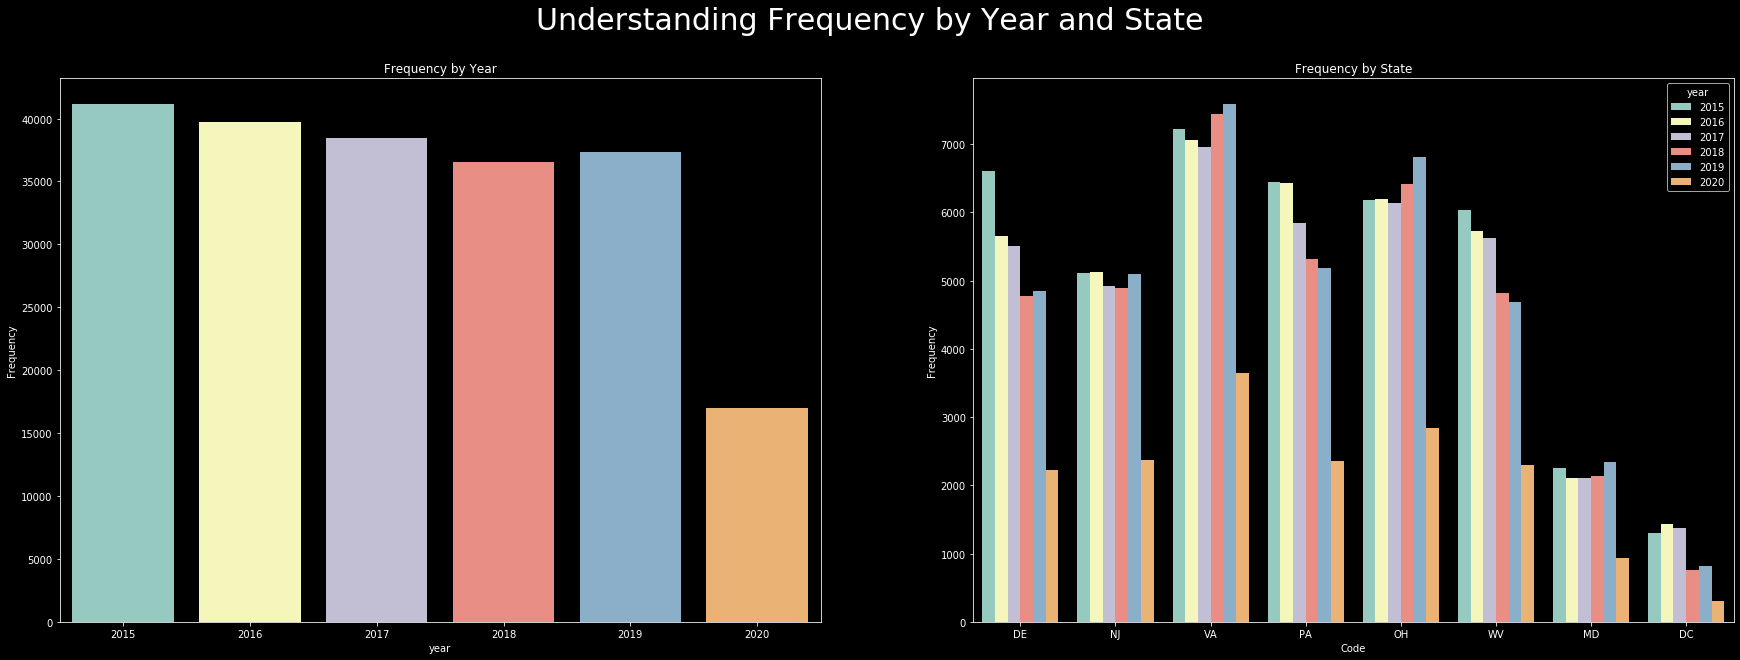

In [6]:
f, axes = plt.subplots(1, 2, figsize=(30, 10))
f.suptitle('Understanding Frequency by Year and State', fontsize=30)

ax = sns.countplot(x="year", data=df_NOAA,ax=axes[0])
ax.set_title('Frequency by Year')
ax.set_ylabel('Frequency')


ax = sns.countplot(x="Code", data=df_NOAA,hue='year',ax=axes[1])
ax.set_title('Frequency by State')
ax.set_ylabel('Frequency')



In [7]:
df_NOAA['Code_station'] = df_NOAA['station'] + df_NOAA['Code']

In [8]:
df_NOAA.head()

station_dt_key       date            station  PRCP  SNOW  \
0  GHCND:US1DEKN0001_2015-01-01 2015-01-01  GHCND:US1DEKN0001   0.0   0.0   
1  GHCND:USC00283662_2015-01-01 2015-01-01  GHCND:USC00283662   0.0   0.0   
2  GHCND:USC00442635_2015-01-01 2015-01-01  GHCND:USC00442635   0.0   NaN   
3  GHCND:USC00440327_2015-01-01 2015-01-01  GHCND:USC00440327   0.0   0.0   
4  GHCND:USC00366233_2015-01-01 2015-01-01  GHCND:USC00366233   0.0   0.0   

   SNWD  AWND  TMAX  TMIN  elevation  ... elevationUnit  longitude  \
0   NaN   NaN   NaN   NaN        9.8  ...        METERS -75.516933   
1   0.0   NaN  32.0  19.0       38.1  ...        METERS -74.804780   
2   NaN   NaN  41.0  27.0        3.0  ...        METERS -75.974400   
3   0.0   NaN  46.0  22.0       67.1  ...        METERS -77.483300   
4   0.0   NaN  30.0  17.0      251.5  ...        METERS -80.361500   

          state location_type     location         State Code  agg_date  year  \
0      Delaware         GHCND  US1DEKN0001      Delaware   DE  01012015  2015   
1    New Jersey         GHCND  USC00283662    New Jersey   NJ  01012015  2015   
2      Virginia         GHCND  USC00442635      Virginia   VA  01012015  2015   
3      Virginia         GHCND  USC00440327      Virginia   VA  01012015  2015   
4  Pennsylvania         GHCND  USC00366233  Pennsylvania   PA  01012015  2015   

          Code_station  
0  GHCND:US1DEKN0001DE  
1  GHCND:USC00283662NJ  
2  GHCND:USC00442635VA  
3  GHCND:USC00440327VA  
4  GHCND:USC00366233PA  

[5 rows x 26 columns]

# df_NOAA_Loco Selection Criteria:

1. Select at the most 6 stations from each state
2. Sort on amount of occurences 
3. Search for stations with all features filled with values similar to top occurence stations.  More features with a value is selected

##NOAA Features

PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)


SNOW = Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)

AWND = Wind

SNWD = Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)


TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file


TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file

##Created features

TDIFF = TMAX - TMIN

In [9]:
df_NOAA_loco = pd.read_csv('UMBC_Energy/Raw/Raw_Station_Location.csv',sep=',')
df_NOAA_loco_visual = df_NOAA_loco.merge(df_NOAA,left_on = ['Key','Code','station'],right_on=['Code_station','Code','station'],how='left')
df_NOAA_loco_visual = df_NOAA_loco_visual.sort_values('date',ascending=True)
df_NOAA_loco_visual = convert_dt(df_NOAA_loco_visual,name='date')
df_NOAA_loco_visual

station Code                  Key  \
0      GHCND:USC00182325   DC  GHCND:USC00182325DC   
44130  GHCND:USC00361920   PA  GHCND:USC00361920PA   
46141  GHCND:USC00363632   PA  GHCND:USC00363632PA   
48155  GHCND:USC00367409   PA  GHCND:USC00367409PA   
50169  GHCND:USC00367477   PA  GHCND:USC00367477PA   
...                  ...  ...                  ...   
26070  GHCND:USC00283662   NJ  GHCND:USC00283662NJ   
46140  GHCND:USC00361920   PA  GHCND:USC00361920PA   
42145  GHCND:USC00338822   OH  GHCND:USC00338822OH   
28084  GHCND:USC00288644   NJ  GHCND:USC00288644NJ   
74324  GHCND:USC00465224   WV  GHCND:USC00465224WV   

                     station_dt_key       date  PRCP  SNOW  SNWD  AWND  TMAX  \
0      GHCND:USC00182325_2015-01-01 2015-01-01  0.00   0.0   0.0   NaN  36.0   
44130  GHCND:USC00361920_2015-01-01 2015-01-01  0.00   0.0   0.0   NaN  33.0   
46141  GHCND:USC00363632_2015-01-01 2015-01-01  0.00   0.0   0.0   NaN  30.0   
48155  GHCND:USC00367409_2015-01-01 2015-01-01  0.00   0.0   0.0   NaN  27.0   
50169  GHCND:USC00367477_2015-01-01 2015-01-01  0.00   0.0   0.0   NaN  22.0   
...                             ...        ...   ...   ...   ...   ...   ...   
26070  GHCND:USC00283662_2020-07-06 2020-07-06  0.09   0.0   0.0   NaN  93.0   
46140  GHCND:USC00361920_2020-07-06 2020-07-06  0.00   0.0   0.0   NaN  95.0   
42145  GHCND:USC00338822_2020-07-06 2020-07-06  0.00   0.0   0.0   NaN  93.0   
28084  GHCND:USC00288644_2020-07-06 2020-07-06  0.00   0.0   0.0   NaN  90.0   
74324  GHCND:USC00465224_2020-07-06 2020-07-06  0.02   0.0   0.0   NaN  90.0   

       ...                 id  elevationUnit longitude                 state  \
0      ...  GHCND:USC00182325         METERS -77.11340  District of Columbia   
44130  ...  GHCND:USC00361920         METERS -77.18940          Pennsylvania   
46141  ...  GHCND:USC00363632         METERS -75.99105          Pennsylvania   
48155  ...  GHCND:USC00367409         METERS -77.73810          Pennsylvania   
50169  ...  GHCND:USC00367477         METERS -78.74921          Pennsylvania   
...    ...                ...            ...       ...                   ...   
26070  ...  GHCND:USC00283662         METERS -74.80478            New Jersey   
46140  ...  GHCND:USC00361920         METERS -77.18940          Pennsylvania   
42145  ...  GHCND:USC00338822         METERS -84.14520                  Ohio   
28084  ...  GHCND:USC00288644         METERS -74.66261            New Jersey   
74324  ...  GHCND:USC00465224         METERS -80.40420         West Virginia   

       location_type     location                 State  agg_date  year  \
0              GHCND  USC00182325  District of Columbia  01012015  2015   
44130          GHCND  USC00361920          Pennsylvania  01012015  2015   
46141          GHCND  USC00363632          Pennsylvania  01012015  2015   
48155          GHCND  USC00367409          Pennsylvania  01012015  2015   
50169          GHCND  USC00367477          Pennsylvania  01012015  2015   
...              ...          ...                   ...       ...   ...   
26070          GHCND  USC00283662            New Jersey  07062020  2020   
46140          GHCND  USC00361920          Pennsylvania  07062020  2020   
42145          GHCND  USC00338822                  Ohio  07062020  2020   
28084          GHCND  USC00288644            New Jersey  07062020  2020   
74324          GHCND  USC00465224         West Virginia  07062020  2020   

              Code_station  
0      GHCND:USC00182325DC  
44130  GHCND:USC00361920PA  
46141  GHCND:USC00363632PA  
48155  GHCND:USC00367409PA  
50169  GHCND:USC00367477PA  
...                    ...  
26070  GHCND:USC00283662NJ  
46140  GHCND:USC00361920PA  
42145  GHCND:USC00338822OH  
28084  GHCND:USC00288644NJ  
74324  GHCND:USC00465224WV  

[80357 rows x 27 columns]

In [10]:
df_NOAA_loco_visual.nunique()

station              41
Code                  8
Key                  41
station_dt_key    80357
date               2014
PRCP                343
SNOW                114
SNWD                 46
AWND                117
TMAX                102
TMIN                107
elevation            40
mindate              25
maxdate               6
latitude             41
name                 41
datacoverage          1
id                   41
elevationUnit         1
longitude            41
state                 8
location_type         1
location             41
State                 8
agg_date           2014
year                  6
Code_station         41
dtype: int64

Text(0, 0.5, 'Frequency')

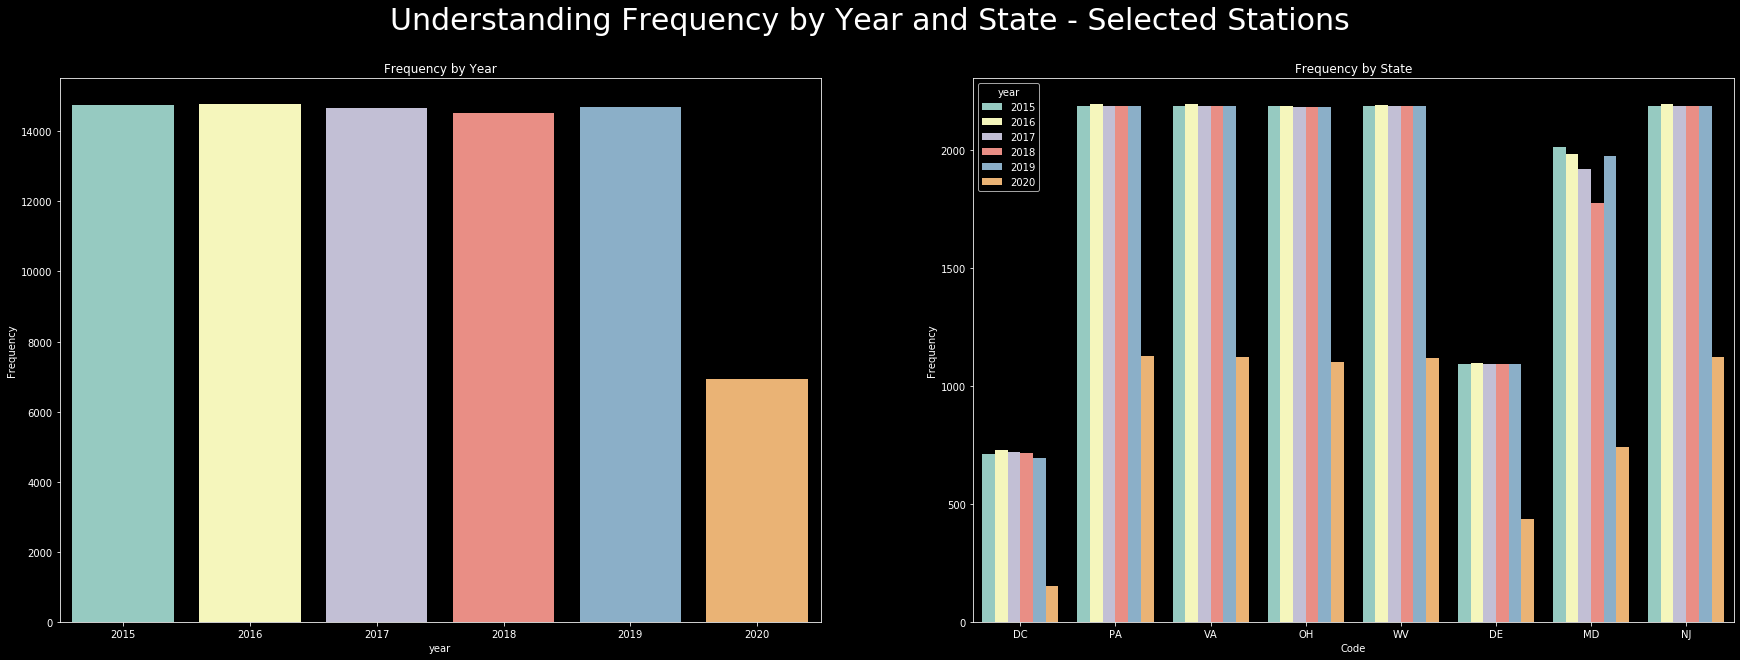

In [11]:
f, axes = plt.subplots(1, 2, figsize=(30, 10))
f.suptitle('Understanding Frequency by Year and State - Selected Stations', fontsize=30)

ax = sns.countplot(x="year", data=df_NOAA_loco_visual,ax=axes[0])
ax.set_title('Frequency by Year')
ax.set_ylabel('Frequency')


ax = sns.countplot(x="Code", data=df_NOAA_loco_visual,hue='year',ax=axes[1])
ax.set_title('Frequency by State')
ax.set_ylabel('Frequency')


# Location of Selected Stations

In [12]:
map_drop_cols = ['year','agg_date']
df_map = df_NOAA_loco_visual.drop(columns=map_drop_cols).groupby('station').mean()
import plotly.express as px

fig = px.scatter_mapbox(df_map, lat="latitude", lon="longitude", hover_name=df_map.index,hover_data=df_map.columns,
                        color_discrete_sequence=["fuchsia"], zoom=3, height=700)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

# Outage Data

Link to Outage Regions:
https://emergencyprocedures.pjm.com/ep/pages/regions.jsf

The data below has been trimmed to only Actuals.  Actuals are when execution_date == forecast date.  We know that from the two lines from the PJM documenation. 


"This data contains the actual and scheduled megawatt generation outages for today and the next six days. In addition to providing total outages, the data show subtotals for each of the following outage types: unplanned (forced), maintenance, and planned." (https://dataminer2.pjm.com/feed/gen_outages_by_type/definition)


Our Goal is to Predict Forced Outage MW

In [13]:
df_outage = pd.read_csv('UMBC_Energy/Raw/forecast_matched_execution.csv',index_col=[0])

df_outage = convert_dt(df_outage,name='forecast_execution_date_ept')
df_outage.dtypes

forecast_execution_date_ept    datetime64[ns]
forecast_date                          object
region                                 object
total_outages_mw                        int64
planned_outages_mw                      int64
maintenance_outages_mw                  int64
forced_outages_mw                       int64
execution_date                          int64
forecast_just_date                      int64
date_match                             object
agg_date                               object
year                                   object
dtype: object

In [14]:
western = df_outage[df_outage['region'] == 'Western']
western = western.set_index('forecast_execution_date_ept').sort_index(ascending=True)
western

forecast_date   region  total_outages_mw  \
forecast_execution_date_ept                                            
2015-05-26                     2015-05-26  Western             16120   
2015-05-27                     2015-05-27  Western             16561   
2015-06-03                     2015-06-03  Western             16778   
2015-06-04                     2015-06-04  Western             17884   
2015-06-05                     2015-06-05  Western             15488   
...                                   ...      ...               ...   
2020-07-01                     2020-07-01  Western              5305   
2020-07-02                     2020-07-02  Western              5898   
2020-07-03                     2020-07-03  Western              5535   
2020-07-04                     2020-07-04  Western              5215   
2020-07-05                     2020-07-05  Western              6463   

                             planned_outages_mw  maintenance_outages_mw  \
forecast_execution_date_ept                                               
2015-05-26                                 7853                    1924   
2015-05-27                                 7977                    2032   
2015-06-03                                 4996                    5346   
2015-06-04                                 5581                    5756   
2015-06-05                                 4946                    5016   
...                                         ...                     ...   
2020-07-01                                    0                    2741   
2020-07-02                                    0                    2834   
2020-07-03                                    0                    2407   
2020-07-04                                    0                    3466   
2020-07-05                                    0                    4232   

                             forced_outages_mw  execution_date  \
forecast_execution_date_ept                                      
2015-05-26                                6343         5262015   
2015-05-27                                6552         5272015   
2015-06-03                                6436         6032015   
2015-06-04                                6547         6042015   
2015-06-05                                5526         6052015   
...                                        ...             ...   
2020-07-01                                2564         7012020   
2020-07-02                                3064         7022020   
2020-07-03                                3128         7032020   
2020-07-04                                1749         7042020   
2020-07-05                                2231         7052020   

                             forecast_just_date date_match  agg_date  year  
forecast_execution_date_ept                                                 
2015-05-26                              5262015        yes  05262015  2015  
2015-05-27                              5272015        yes  05272015  2015  
2015-06-03                              6032015        yes  06032015  2015  
2015-06-04                              6042015        yes  06042015  2015  
2015-06-05                              6052015        yes  06052015  2015  
...                                         ...        ...       ...   ...  
2020-07-01                              7012020        yes  07012020  2020  
2020-07-02                              7022020        yes  07022020  2020  
2020-07-03                              7032020        yes  07032020  2020  
2020-07-04                              7042020        yes  07042020  2020  
2020-07-05                              7052020        yes  07052020  2020  

[1859 rows x 11 columns]

In [15]:
western.nunique()

forecast_date             1859
region                       1
total_outages_mw          1775
planned_outages_mw        1050
maintenance_outages_mw    1665
forced_outages_mw         1606
execution_date            1859
forecast_just_date        1859
date_match                   1
agg_date                  1859
year                         6
dtype: int64

In [16]:
plot_main = ['total_outages_mw','planned_outages_mw','maintenance_outages_mw','forced_outages_mw']

plot_col = ['year','forced_outages_mw']
plot_year = str(2019)

df_western_plot = western[plot_col]

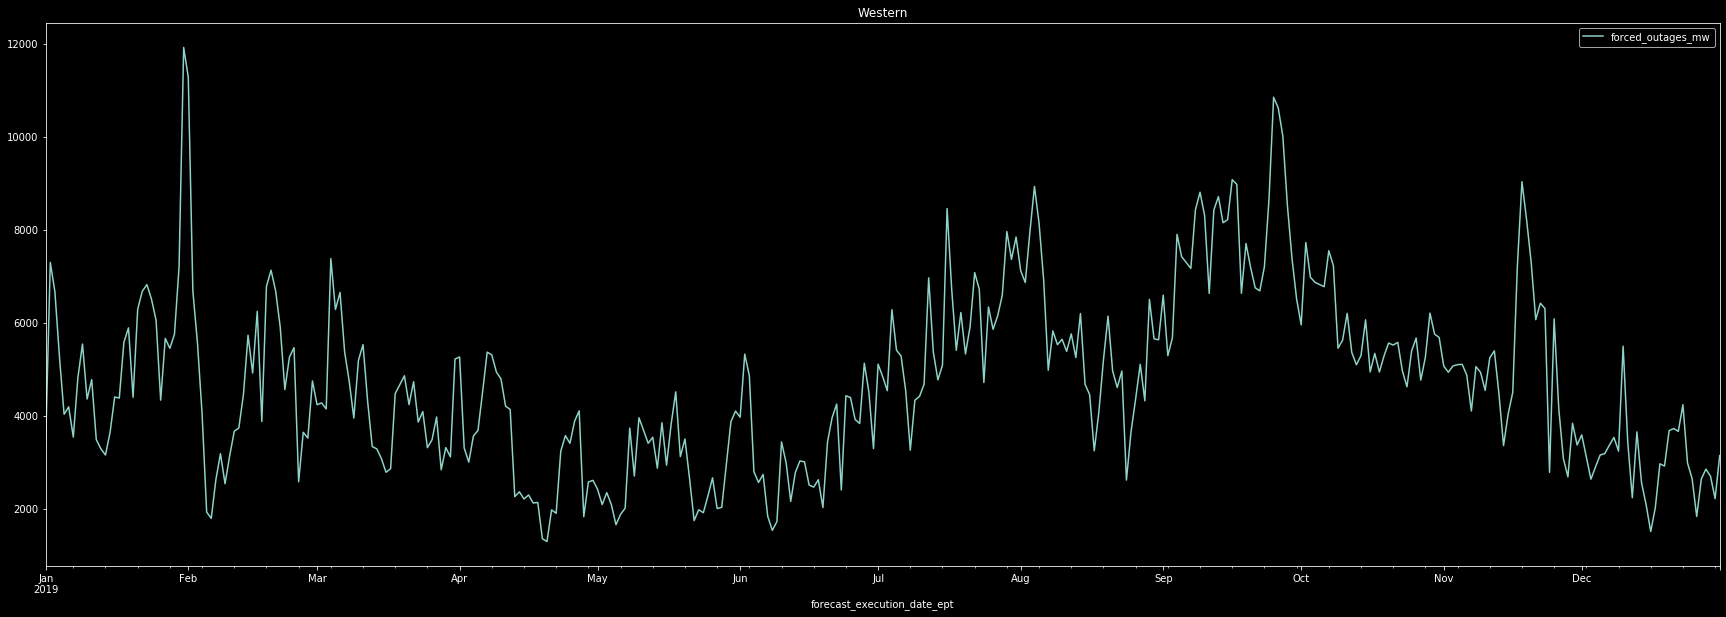

In [17]:
df_western_plot[df_western_plot.year == plot_year].plot(title= 'Western',figsize=(30,10))

## Top and Bottom Plot State and Year

In [18]:
top_state = "WV"
top_data = df_NOAA_loco_visual.query(f'Code == "{top_state}" & year == "{plot_year}" ')

bottom_state = "OH"
bottom_data = df_NOAA_loco_visual.query(f'Code == "{bottom_state}" & year == "{plot_year}"')



## Reuse plot below for all weather features

In [19]:
weather_features = ['PRCP','SNOW','SNWD','AWND','TMAX','TMIN']

## PRCP

Text(0.5, 1.0, 'bottom_state')

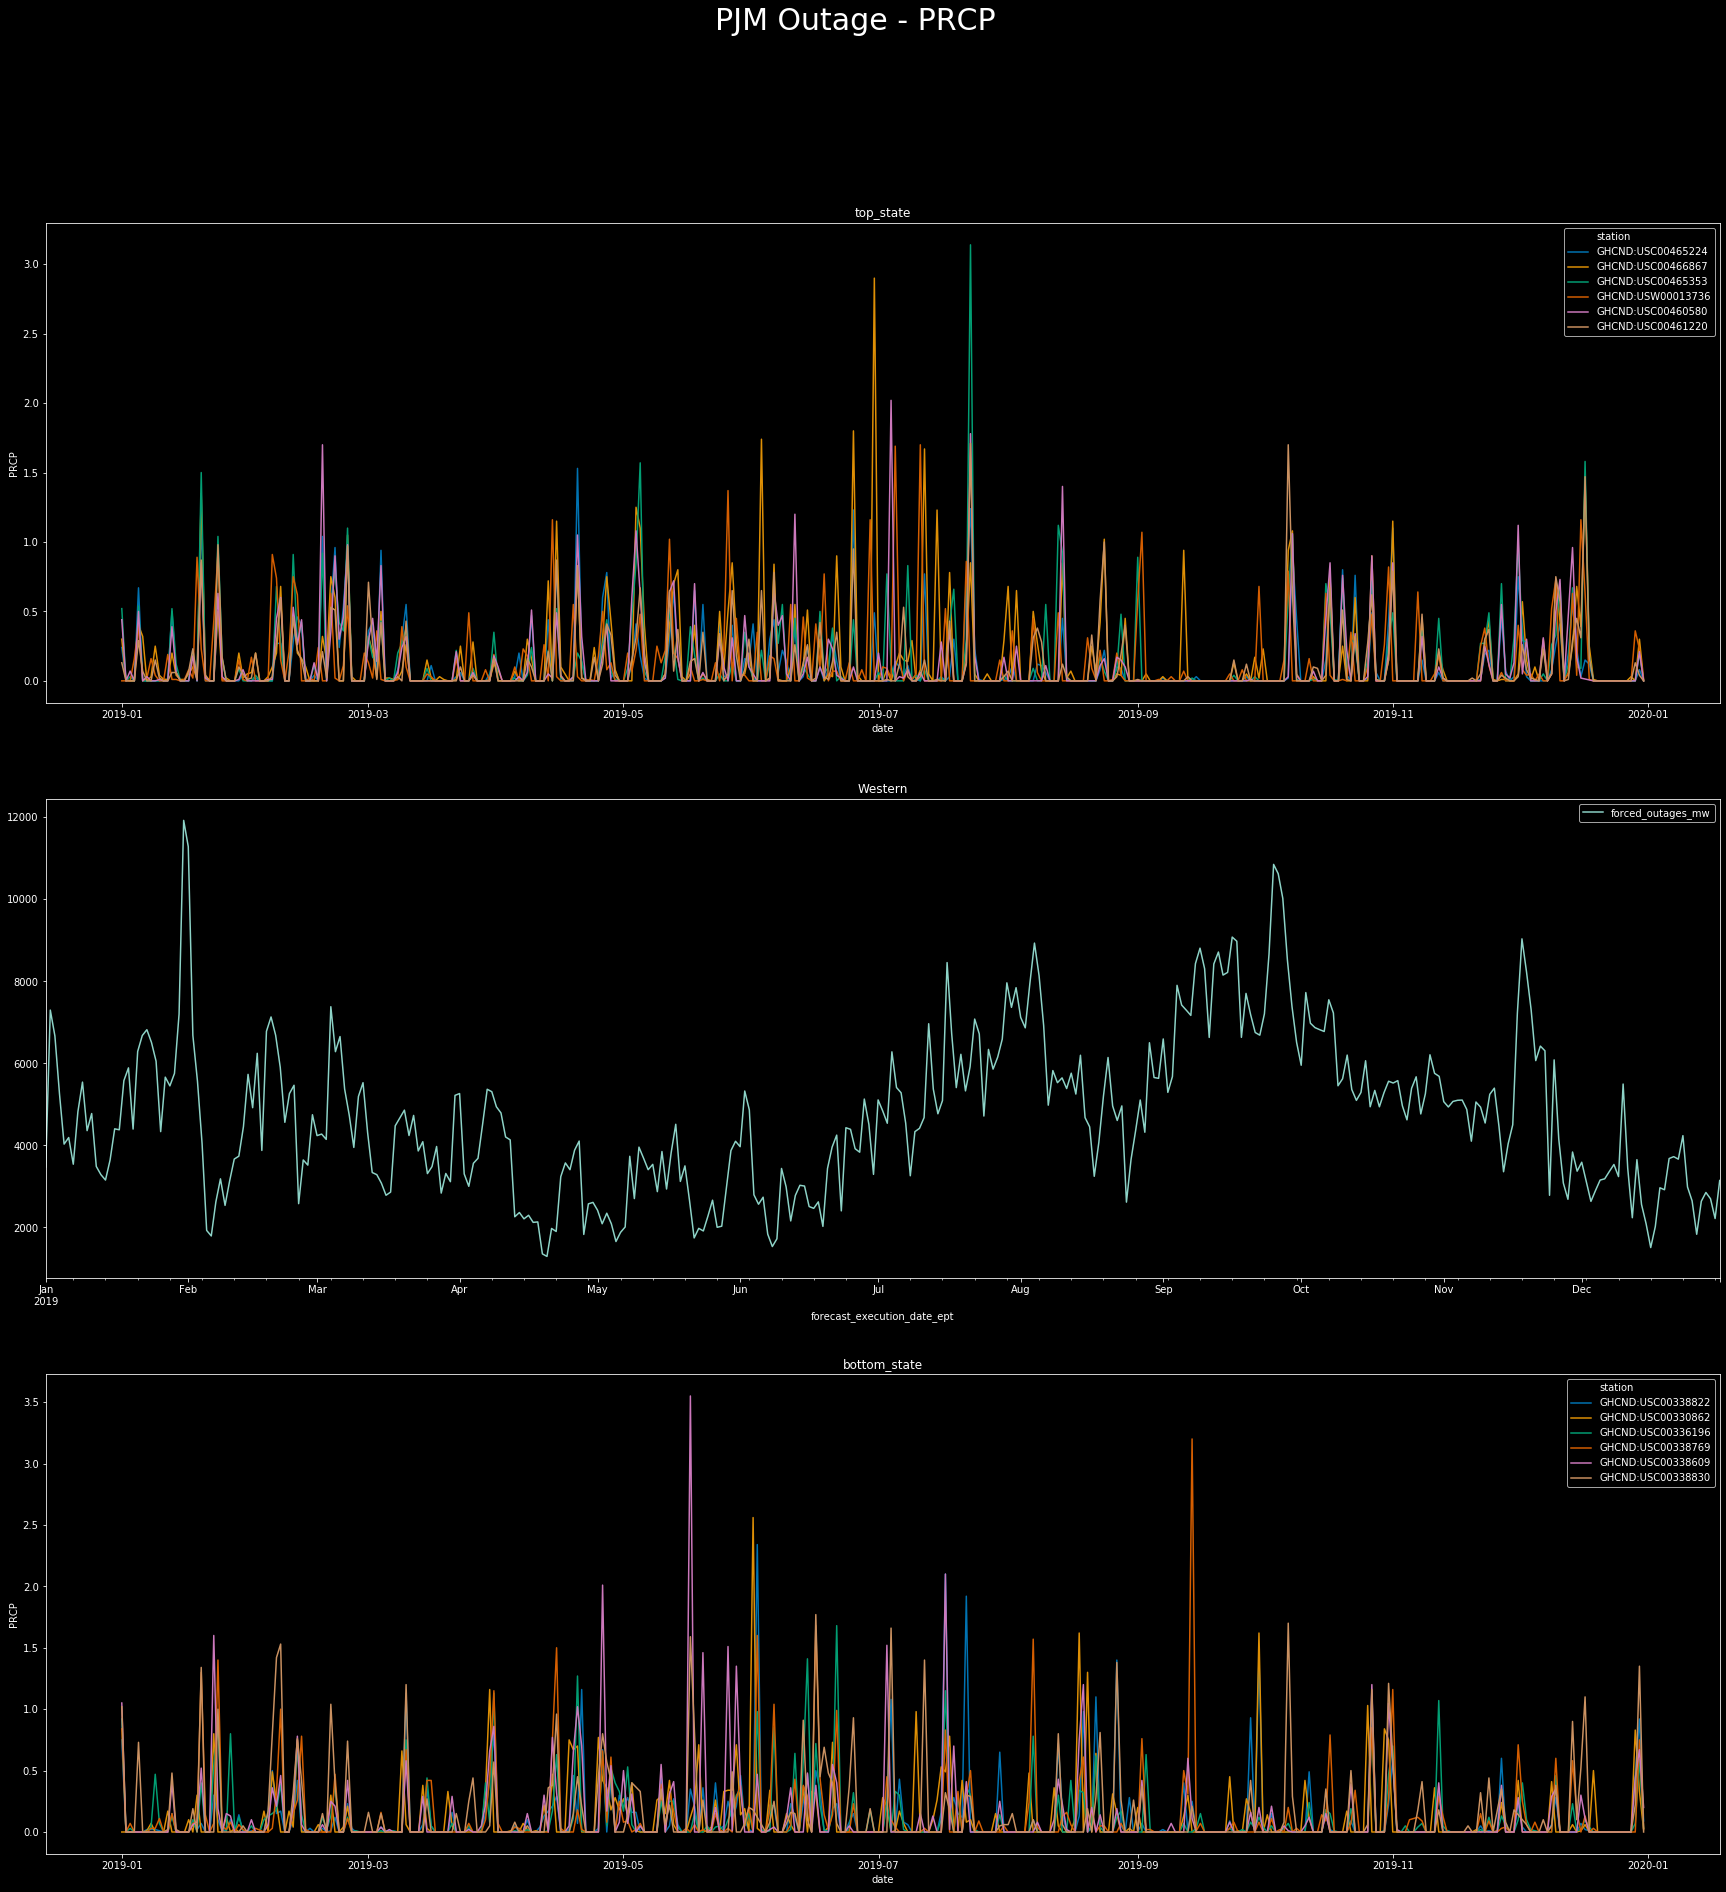

In [20]:
f, axes = plt.subplots(3, 1, figsize=(30, 30))
f.suptitle(f'PJM Outage - PRCP', fontsize=30)


sns.lineplot(x='date',y='PRCP',data=top_data,hue='station',ax=axes[0],palette='colorblind').set_title(f'top_state')



df_western_plot[df_western_plot.year == plot_year].plot(title= 'Western',ax=axes[1])


sns.lineplot(x='date',y='PRCP',data=bottom_data,hue='station',ax=axes[2],palette='colorblind').set_title(f'bottom_state')


# Usage Data

In [21]:
## The cell below takes a couple minutes to run

df_usage_2015 = pd.read_excel('UMBC_Energy/Energy_usage/Usage_2015_2020.xlsx', 'hrl_load_metered_2015')
df_usage_2016 = pd.read_excel('UMBC_Energy/Energy_usage/Usage_2015_2020.xlsx', 'hrl_load_metered_2016')
df_usage_2017 = pd.read_excel('UMBC_Energy/Energy_usage/Usage_2015_2020.xlsx', 'hrl_load_metered_2017')
df_usage_2018 = pd.read_excel('UMBC_Energy/Energy_usage/Usage_2015_2020.xlsx', 'hrl_load_metered_2018')
df_usage_2019 = pd.read_excel('UMBC_Energy/Energy_usage/Usage_2015_2020.xlsx', 'hrl_load_metered_2019')
df_usage_2020 = pd.read_excel('UMBC_Energy/Energy_usage/Usage_2015_2020.xlsx', 'hrl_load_metered_2020')
df_usage = pd.concat([df_usage_2015,df_usage_2016,df_usage_2017,df_usage_2018,df_usage_2019,df_usage_2020])
df_usage = convert_dt(df_usage, name='datetime_beginning_utc')
df_usage = df_usage.set_index('datetime_beginning_utc')

df_usage.groupby('mkt_region').sum()

df_usage[df_usage.mkt_region != 'RTO'].plot(subplots=True,title= 'PJM Usage Total',figsize=(20, 20))